# Faktoren und deren Einfluss auf die Visaantragsannahme

Im Folgenden soll ein genauer Blick auf die angenommenen oder abgelehnten Visaanträge geworfen werden und Faktoren ausfindig gemacht werden, welche die Annahme eines Visaantrages beeinflussen.

In [53]:
import cleanup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import modules

#plt.style.use('../own_style.mplstyle')

In [54]:
# cleanup.generate_cleaned_df()


In [55]:
col_list = ["case_status", "country_of_citizenship","employer_name" ,"employer_city", "foreign_worker_info_education", "prevailing_wage_level_9089", "prevailing_wage_soc_title", "prevailing_wage_amount_9089", "prevailing_wage_unit_of_pay_9089", "us_economic_sector", "class_of_admission"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Zuerst werden die vorhandenen Daten angesehen.

<AxesSubplot:title={'center':'Case Status Distribution'}, ylabel='Case Status'>

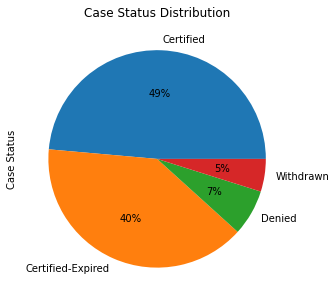

In [56]:
visas_df["case_status"].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=[15,5], ylabel = "Case Status", title = "Case Status Distribution")

Die vorhandenen Werte sollen kurz erklärt werden. Die Erklärungen dafür wurden im Internet gefunden.

- Certified:
    - A “certified” status indicates the labor certification is granted. The certified application and a complete Final Determination form will be sent to the employer, or, if appropriate, to the employer’s agent or attorney, indicating the employer may file all the documents with the appropriate office in the Department of Homeland Security (DHS).
    - https://www.usavisanow.com/perm/perm-faq/perm-online-status-indicators/
    - PERM certified status means it has been approved and is valid for 180 days from the date of approval.
    - https://www.am22tech.com/uscis/perm-processing-time/
- Certified-Expired:
    - After the Labor Certification is approved by the DOL, an Immigrant Petition related to the Labor Certification should be filed with the U.S.C.I.S. before the expiration of the labor certification. The certification has a validity period of 180-days and expires if not submitted to USCIS within this period.
    - https://immsolutionsllc.com/work-visas/perm-labor-certification
    - PERM certified expired means that PERM was approved but was not used within 6 months to file i140 with USCIS.
    - https://www.am22tech.com/uscis/perm-processing-time/
- Denied:
    - A “denied” status indicates the application is denied. A Final Determination form, stating the reasons for the determination and advising the employer of how to request review, should the employer choose to do so, will be sent to the employer. The Final Determination must be included in any request for review, therefore, the employer must wait to receive the form before making such a request. The employer is also advised to wait for the Final Determination before filing a new application for the same alien to avoid repeating errors made in the original application.
    - https://www.usavisanow.com/perm/perm-faq/perm-online-status-indicators/
    - PERM application was denied by DOL.
    - https://www.am22tech.com/uscis/perm-processing-time/
- Withdrawn:
    - A “withdrawn” status indicates the employer has withdrawn the application.
    - https://www.usavisanow.com/perm/perm-faq/perm-online-status-indicators/
    - PERM application was withdrawn by employer.
    - https://www.am22tech.com/uscis/perm-processing-time/

Regarding the analysis question, factors influencing the acceptance of applications, some changes eill be made in the dataset.

"Certified-Expired" will be changed into "Certified"
And columns containing "Withdrawn" will be deleted.

Um der Analysefrage nach Visaantragannahme oder -ablehnung näher zu kommen, werden Änderungen im Datensatz vorgenommen:
- "Certified-Expired" wird abgeändert zu "Certified"
- Datensätze, welche "Withdrawn" sind werden ersatzlos gelöscht


In [57]:
visas_df = cleanup.convert_case_status_to_certified_or_denied(visas_df)


Das Ergbnis der Datensatzänderungen soll visualisiert werden.

<AxesSubplot:title={'center':'Case Status Distribution'}>

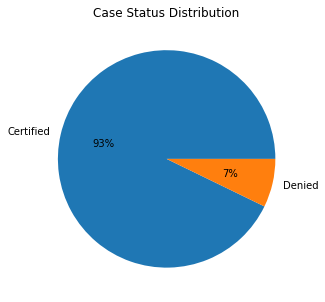

In [58]:
visas_df["case_status"].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=[15,5], ylabel = "", title = "Case Status Distribution")

<AxesSubplot:>

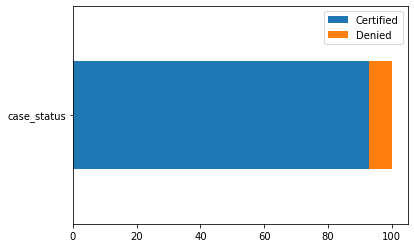

In [59]:
visas_df["case_status"].value_counts(normalize=True).mul(100).to_frame().T.plot.barh(stacked=True)

In [60]:
visas_df["case_status"].value_counts(normalize=True).mul(100)



Certified    92.798623
Denied        7.201377
Name: case_status, dtype: float64

Über den gesamten Anaylsebericht hinweg, soll der Medianwert als Referenzwert angezeigt werden.

In [61]:
median_certified_normalized = visas_df["case_status"].value_counts(normalize=True).mul(100).loc["Certified"]

In [62]:
median_certified_normalized

92.79862312167292

## Der Einfluss des Herkunftslandes

Hat das Herkunftsland einen Einfluss auf die Visaentscheidung?

Hier soll ein Blick auf die 20 am meist im Datensatz vertretenen Herkunftsländer geworfen werden.

In [63]:
top20 = visas_df["country_of_citizenship"].value_counts().nlargest(20).reset_index()

top20.columns = ['country_of_citizenship', 'count']

top20 = top20.set_index(['country_of_citizenship'])

In [64]:
top20.head(20)

,count
country_of_citizenship,
INDIA,196585
CHINA,27454
SOUTH KOREA,22254
CANADA,14109
MEXICO,8564
PHILIPPINES,8182
UNITED KINGDOM,4714
TAIWAN,3944
PAKISTAN,3776


Die 20 am häufgisten vorkommenden Herkunftsländer sind:

<AxesSubplot:xlabel='country_of_citizenship'>

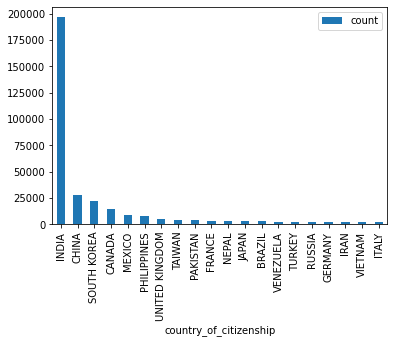

In [65]:
top20.plot.bar()

Alle Einträge, welche nicht mit den 20 am häufigsten vorkommenden Länder verbunden sind, werden aus dem Analysedatensatz dieser Fragestellung verworfen.
Der Analysedatensatz ist df_top.

In [66]:
df_top = visas_df.loc[visas_df['country_of_citizenship'].isin(top20.reset_index()['country_of_citizenship'])]

Es gibt große Unterschiede in der absoluten Anzahl der Visaanträge zwischen den verschiedenen Herkunftländer.
So ist Indien viel häufiger im Datensatz vertreten, alls alle anderen Herkunftsländer.

Um die verschiedenen Herkunftsländer miteinander vergleichen zu können, wechseln wir in der Analyse von absoluten auf relative Kennzahlen.

In [67]:
df_top_normalized_case_status = df_top["case_status"].groupby(df_top["country_of_citizenship"]).value_counts(normalize=True).mul(100).reset_index(name='counts')

In [68]:
df_top_normalized_case_status.head()

,country_of_citizenship,case_status,counts
0,BRAZIL,Certified,90.547798
1,BRAZIL,Denied,9.452202
2,CANADA,Certified,93.691970
3,CANADA,Denied,6.308030
4,CHINA,Certified,94.172070


Nun pivotieren wir die entstandene Tabelle in ein anderes Format um, um die Ausgabe als gestaffeltes Balkendiagramm zu ermöglichen.

In [69]:
df_top_normalized_case_status = df_top_normalized_case_status.pivot(index="country_of_citizenship", columns = "case_status", values = "counts")

In [70]:
df_top_normalized_case_status.head()

case_status,Certified,Denied
country_of_citizenship,,
BRAZIL,90.547798,9.452202
CANADA,93.691970,6.308030
CHINA,94.172070,5.827930
FRANCE,94.131223,5.868777
GERMANY,94.289509,5.710491


Wir werden der Vollständigkeit halber noch die absoluten Kennzahlen je Land hinzufügen.

In [71]:
df_top_normalized_case_status = df_top_normalized_case_status.merge(top20, left_on='country_of_citizenship', right_on='country_of_citizenship')
df_top_normalized_case_status = df_top_normalized_case_status.sort_values(by=['count'], ascending=False)

df_top_normalized_case_status.head()

,Certified,Denied,count
country_of_citizenship,,,
INDIA,95.158328,4.841672,196585
CHINA,94.172070,5.827930,27454
SOUTH KOREA,88.384111,11.615889,22254
CANADA,93.691970,6.308030,14109
MEXICO,76.389538,23.610462,8564


Es folgt die Ausgabe als gestaffeltes Balkendiagramm.

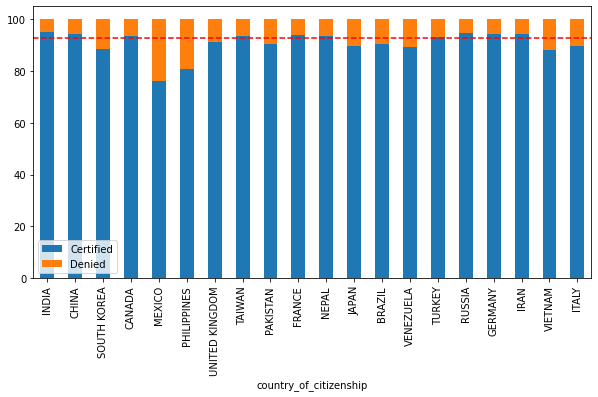

In [72]:
df_top_normalized_case_status[['Certified','Denied']].plot.bar(stacked=True, figsize=(10,5))

plt.axhline(median_certified_normalized, color='r', linestyle='--')

plt.show()

Es lässt sich festhalten, dass insbesondere Bewerber aus Mexiko und Vietnam häufiger abgelehnt werden, als die restlichen Herkunftsländer.
Es scheint, als hätte das Herkunftsland durchaus einen Einfluss auf die Visaentscheidung.

## Der Einfluss des Arbeitgebers




In [73]:
visas_df["employer_name"].value_counts()

COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION         11936
MICROSOFT CORPORATION                                  8082
INTEL CORPORATION                                      6120
GOOGLE INC.                                            5060
AMAZON CORPORATE LLC                                   3639
                                                      ...  
ACTIVMED PRACTICES AND RESEARCH, INC.                     1
MIDATLANTIC CONSTRUCTION & DESIGN ASSOCIATES, INC.        1
SMART PHARMACY LLC                                        1
1B.USA, LLC                                               1
HP TUNERS, LLC                                            1
Name: employer_name, Length: 69576, dtype: int64

In [74]:

def influence_on_acceptance_stacked_bar_chart(dataFrameToAnalyze = pd.DataFrame, invokesInfluence = str, isInfluencedBy = str, top = int, binnedData = False):

    #top columns of invokesInfluence
    topDf = dataFrameToAnalyze[invokesInfluence].value_counts().nlargest(top).reset_index()
    topDf.columns = [invokesInfluence, 'count']
    topDf = topDf.set_index([invokesInfluence])
    df_top = dataFrameToAnalyze.loc[dataFrameToAnalyze[invokesInfluence].isin(topDf.reset_index()[invokesInfluence])]


    df_top_normalized_case_status = df_top[isInfluencedBy].groupby(df_top[invokesInfluence]).value_counts(normalize=True).mul(100).reset_index(name='counts')

    df_top_normalized_case_status = df_top_normalized_case_status.pivot(index=invokesInfluence, columns = isInfluencedBy, values = "counts")

    df_top_normalized_case_status = df_top_normalized_case_status.merge(topDf, left_on=invokesInfluence, right_on=invokesInfluence)



    if binnedData == True:
        df_top_normalized_case_status = df_top_normalized_case_status.sort_values(by=[invokesInfluence], ascending=False)
    else:
        df_top_normalized_case_status = df_top_normalized_case_status.sort_values(by=['count'], ascending=False)


    df_top_normalized_case_status = df_top_normalized_case_status.fillna(0)
    #print(df_top_normalized_case_status.head())



    legend = list(df_top_normalized_case_status.loc[:, df_top_normalized_case_status.columns != 'count'].columns)

    #df_top_normalized_case_status[dataFrameToAnalyze[isInfluencedBy].unique()].plot.bar(stacked=True, figsize=(10,5))
    df_top_normalized_case_status[legend].plot.bar(stacked=True, figsize=(10,5))

    plt.axhline(median_certified_normalized, color='r', linestyle='--')

    plt.show()

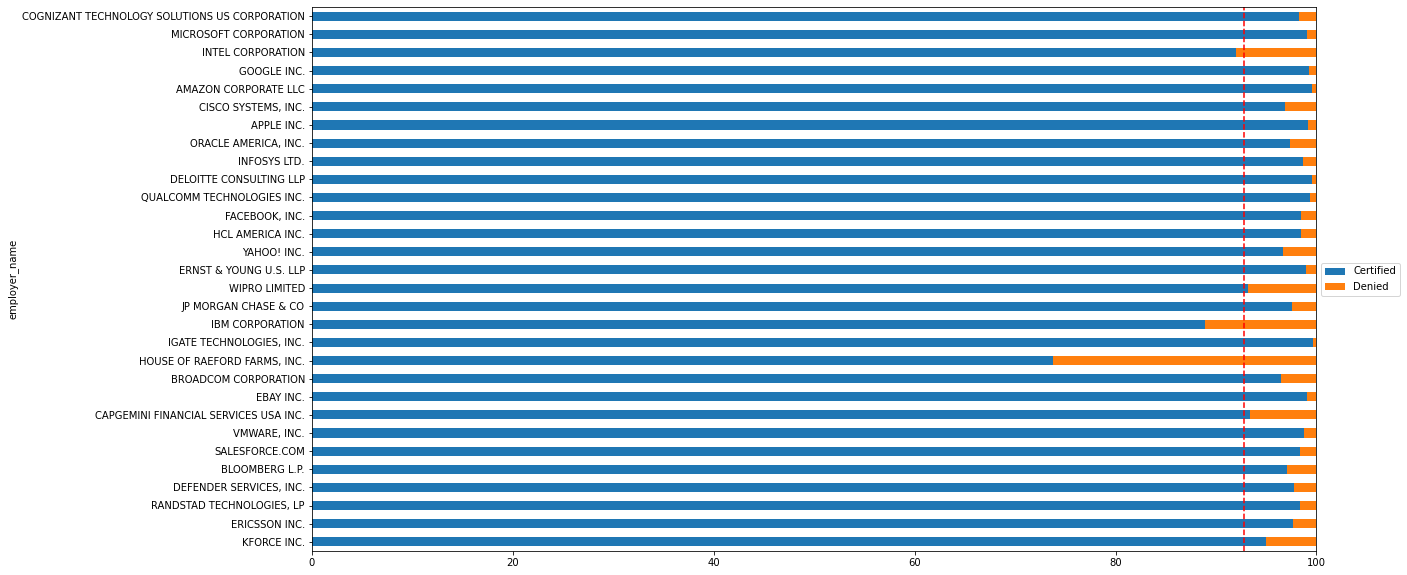

In [75]:
modules.invokes_influenced_is_influenced_by_stacked_bar_chart(visas_df, "employer_name", "case_status", 30, 20, medianLineInt=median_certified_normalized, barh = True)

Interpretationshilfe:
Die Arbeitgeber sind absteigend der Anzahl an vorhandenen Datensätze angeordnet.
Ein Balken spielt 100% der vorhandenen Datensätze je Arbeitgeber dar.
Dieser Balken kann durch den angegebenen Status relativ aufgeteilt werden. In diesem Fall in das Verhältnis "Certified" und das Verhältnis "Denied".

Die Anträge von Amazon, werden viel öfter als der Durschnitt angenommen, ebenso bei Google.
Das kann verschiedene Gründe haben.

- Der US Regierung ist bewusst, dass diese Unternehmen internationale Aushängeschilder sind. Deswegen werden diese Unternehmen bevorzugt.
- Amazon und Google stellen nur Anträge, wenn diese inhaltlich korrekt sind und sie sich sicher sind, dass diese angenommen werden.

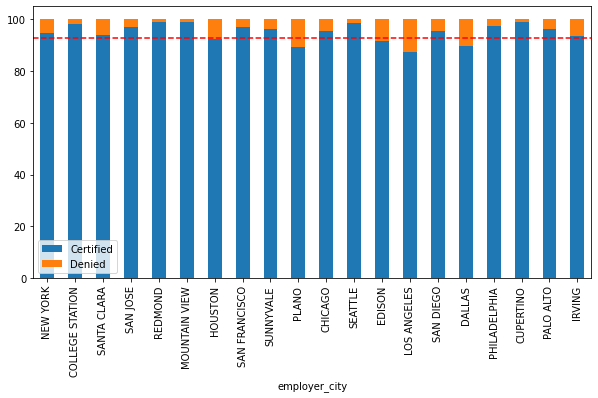

In [76]:
influence_on_acceptance_stacked_bar_chart(visas_df, "employer_city", "case_status", 20)

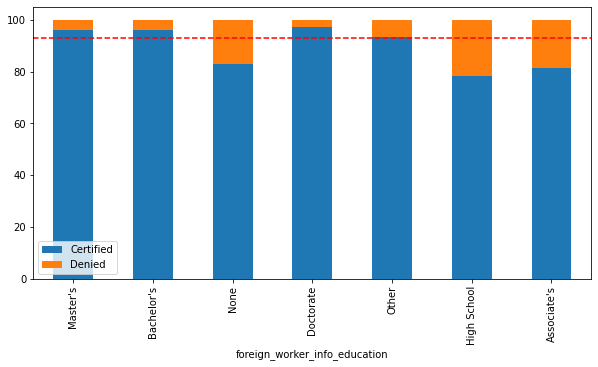

In [77]:
influence_on_acceptance_stacked_bar_chart(visas_df, "foreign_worker_info_education", "case_status", 20)

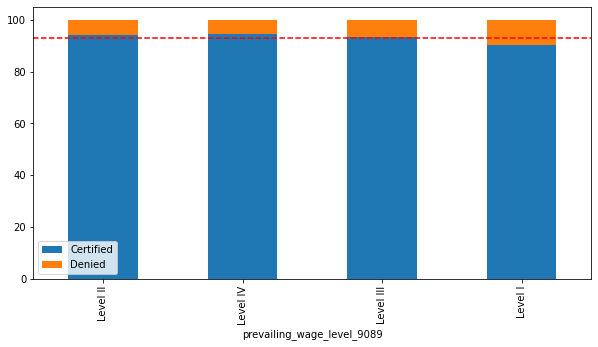

In [78]:
influence_on_acceptance_stacked_bar_chart(visas_df, "prevailing_wage_level_9089", "case_status", 20)


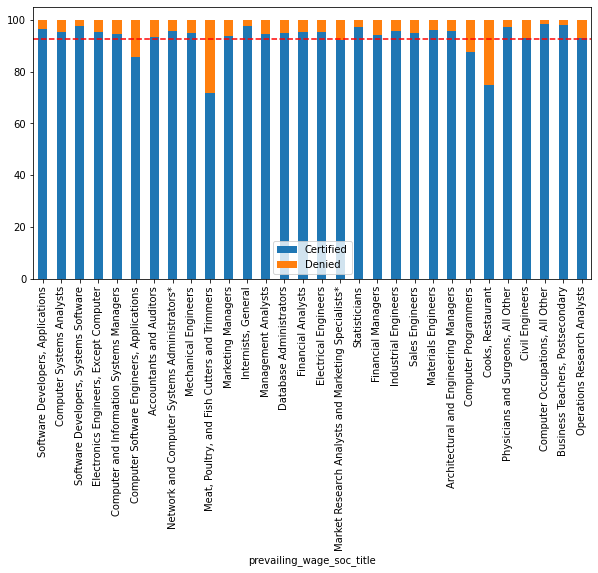

In [79]:
influence_on_acceptance_stacked_bar_chart(visas_df, "prevailing_wage_soc_title", "case_status", 30)

## The Influence of the wage


In [80]:
wage_df = visas_df[visas_df["prevailing_wage_unit_of_pay_9089"].str.contains("yr", na=False)]

In [81]:
wage_df["prevailing_wage_amount_9089"] = wage_df["prevailing_wage_amount_9089"].fillna(0).astype(int)



In [82]:

dsf = wage_df[wage_df['prevailing_wage_amount_9089'].between(0, 200000)]


In [83]:
dsf['prevailing_wage_amount_9089_bins'] = pd.qcut(dsf['prevailing_wage_amount_9089'], q=20)

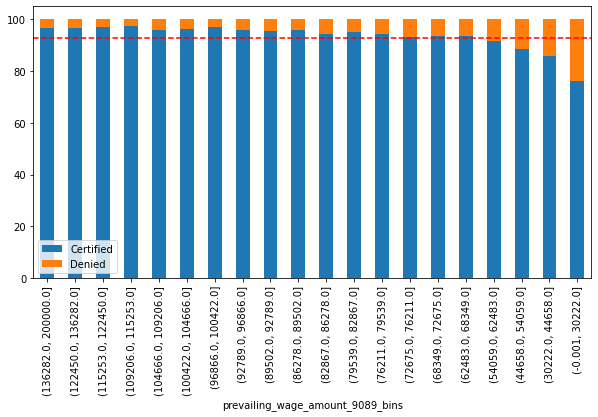

In [84]:

influence_on_acceptance_stacked_bar_chart(dsf, "prevailing_wage_amount_9089_bins", "case_status", 20, True)

The pw_wage has influnce on the acceptance of the application. Applications associated with low wage tend to get declined.


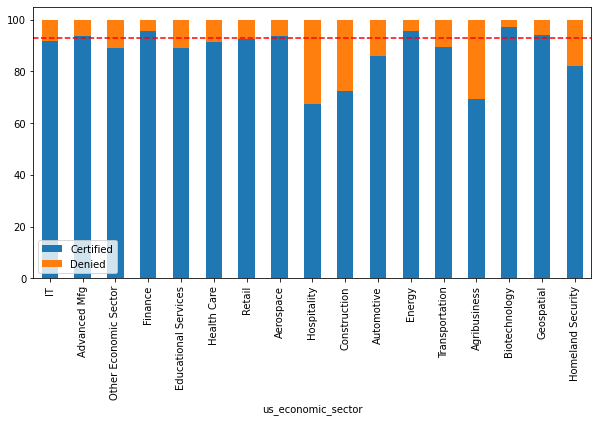

In [85]:

influence_on_acceptance_stacked_bar_chart(visas_df, "us_economic_sector", "case_status", 40)

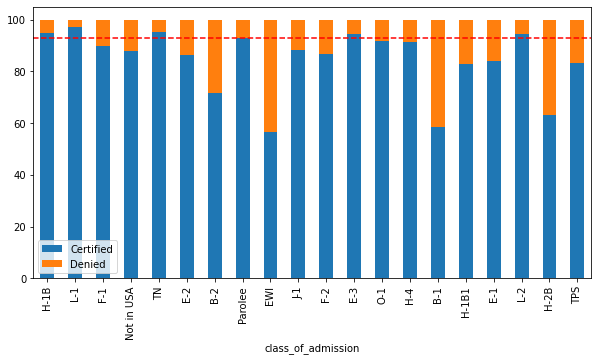

In [86]:

influence_on_acceptance_stacked_bar_chart(visas_df, "class_of_admission", "case_status", 20)

In [87]:
tempdf = visas_df[visas_df['class_of_admission'].notna()]

tempdf['class_of_admission'].value_counts()

H-1B          270467
L-1            19301
F-1            13994
Not in USA      7713
TN              4069
E-2             3941
B-2             3164
Parolee         2503
EWI             1878
J-1              905
F-2              879
E-3              837
O-1              761
H-4              693
B-1              591
H-1B1            519
E-1              513
L-2              503
H-2B             397
TPS              178
P-1              159
H-2A             151
A1/A2            149
G-4              102
R-1              102
J-2               95
I                 77
G-5               59
VWT               57
H-1A              40
C-1               38
P-3               36
H-3               36
A-3               28
M-1               25
O-2               19
TD                12
O-3               11
G-1               11
VWB               10
H-1C               7
C-3                6
P-4                6
D-1                6
Q                  5
Parol              5
R-2                5
T-1          

In [88]:
tempdf['class_of_admission'].isna().sum()

0

In [89]:
def influence_on_acceptance_stacked_bar_chart_1(dataFrameToAnalyze = pd.DataFrame, invokesInfluence = str, isInfluencedBy = str, CountOfTopValuesInvokesInfluence = int, CountOfTopValuesIsInfluencedBy = int, binnedData = False):

    #top columns of invokesInfluence
    topDf = dataFrameToAnalyze[invokesInfluence].value_counts().nlargest(CountOfTopValuesInvokesInfluence).reset_index()
    topDf.columns = [invokesInfluence, 'count']
    topDf = topDf.set_index([invokesInfluence])
    df_top = dataFrameToAnalyze.loc[dataFrameToAnalyze[invokesInfluence].isin(topDf.reset_index()[invokesInfluence])]

    #top columns of isInfluencedBy
    topDfInfluencedBy = dataFrameToAnalyze[isInfluencedBy].value_counts().nlargest(CountOfTopValuesIsInfluencedBy).reset_index()
    topDfInfluencedBy.columns = [isInfluencedBy, 'count']
    topDfInfluencedBy = topDfInfluencedBy.set_index([isInfluencedBy])
    df_top = df_top.loc[df_top[isInfluencedBy].isin(topDfInfluencedBy.reset_index()[isInfluencedBy])]




    df_top_normalized_case_status = df_top[isInfluencedBy].groupby(df_top[invokesInfluence]).value_counts(normalize=True).mul(100).reset_index(name='counts')

    df_top_normalized_case_status = df_top_normalized_case_status.pivot(index=invokesInfluence, columns = isInfluencedBy, values = "counts")

    df_top_normalized_case_status = df_top_normalized_case_status.merge(topDf, left_on=invokesInfluence, right_on=invokesInfluence)



    if binnedData == True:
        df_top_normalized_case_status = df_top_normalized_case_status.sort_values(by=[invokesInfluence], ascending=False)
    else:
        df_top_normalized_case_status = df_top_normalized_case_status.sort_values(by=['count'], ascending=False)


    df_top_normalized_case_status = df_top_normalized_case_status.fillna(0)


    legend = list(df_top_normalized_case_status.loc[:, df_top_normalized_case_status.columns != 'count'].columns)

    #print(df_top_normalized_case_status.head(20))

    #df_top_normalized_case_status[dataFrameToAnalyze[isInfluencedBy].unique()].plot.bar(stacked=True, figsize=(10,5))
    cmap = cm.get_cmap('twilight')
    df_top_normalized_case_status[legend].plot.bar(stacked=True, figsize=(10,5))

    plt.axhline(median_certified_normalized, color='r', linestyle='--')

    plt.show()

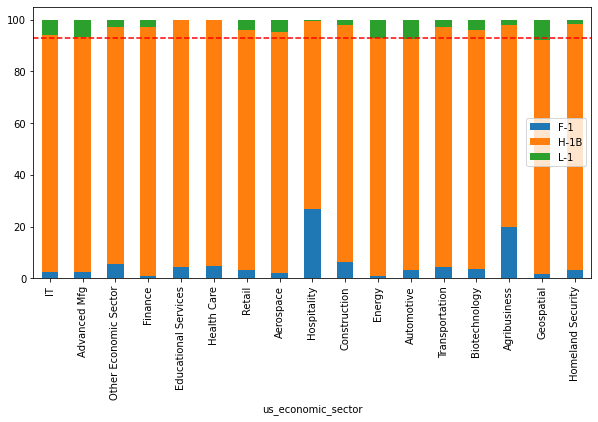

In [90]:

influence_on_acceptance_stacked_bar_chart_1(tempdf, "us_economic_sector", "class_of_admission", 30, 3)

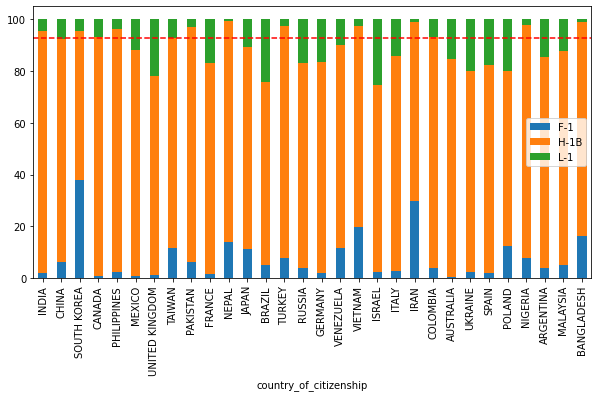

In [91]:
influence_on_acceptance_stacked_bar_chart_1(tempdf, "country_of_citizenship", "class_of_admission", 30, 3)


In [92]:

col_list = ["case_status", "case_received_date", "decision_date", "prevailing_wage_amount_9089", "prevailing_wage_unit_of_pay_9089", "class_of_admission"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)


C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [93]:

visas_df =  cleanup.convert_case_status_to_certified_or_denied(visas_df)

In [94]:
visas_df['decision_date'] = pd.to_datetime(visas_df["decision_date"])
visas_df
visas_df["decision_date_year"] = visas_df["decision_date"].dt.year

In [95]:
tmp = pd.DataFrame()
tmp = visas_df.groupby(["decision_date_year", "case_status"])["case_status"].count()

In [96]:
tmp = tmp.to_frame().unstack()

In [97]:
tmp


case_status       
case_status          Certified Denied
decision_date_year                   
2011                      9474   1128
2012                     19116   2838
2013                     32040   5433
2014                     69458   4423
2015                     86404   5934
2016                    114027   5893

In [98]:
tmp = tmp.reset_index()


In [99]:
tmp= tmp.set_index("decision_date_year")

In [100]:
tmp = tmp["case_status"]

In [101]:
tmp["relation"] = tmp["Denied"]/(tmp["Certified"]+ tmp["Denied"])

In [102]:
tmp

case_status,Certified,Denied,relation
decision_date_year,,,
2011,9474,1128,0.106395
2012,19116,2838,0.129270
2013,32040,5433,0.144984
2014,69458,4423,0.059867
2015,86404,5934,0.064264
2016,114027,5893,0.049141


<AxesSubplot:xlabel='decision_date_year'>

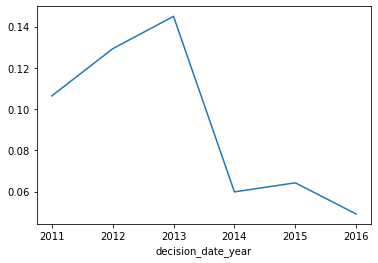

In [103]:
tmp["relation"].plot()


FAANG: http://conormclaughlin.net/2019/04/h1-b-visa-analysis/
https://www.statista.com/chart/22079/denial-rate-for-h1b-visa-petitions/